# # Decision_Tree & Random_Forest
## Company _data



### Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [33]:
company = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\Decision_Tree & Random_Forest\Company_Data.csv')

In [34]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### EDA

In [35]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


(array([ 4.,  1.,  1.,  3.,  5.,  8.,  9., 16., 22., 33., 25., 25., 33.,
        25., 31., 25., 30., 24., 13., 16., 11., 11.,  9.,  9.,  6.,  1.,
         1.,  1.,  1.,  1.]),
 array([ 0.        ,  0.54233333,  1.08466667,  1.627     ,  2.16933333,
         2.71166667,  3.254     ,  3.79633333,  4.33866667,  4.881     ,
         5.42333333,  5.96566667,  6.508     ,  7.05033333,  7.59266667,
         8.135     ,  8.67733333,  9.21966667,  9.762     , 10.30433333,
        10.84666667, 11.389     , 11.93133333, 12.47366667, 13.016     ,
        13.55833333, 14.10066667, 14.643     , 15.18533333, 15.72766667,
        16.27      ]),
 <a list of 30 Patch objects>)

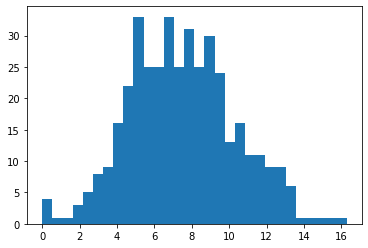

In [36]:
plt.hist(company.Sales,bins=30)

(array([144.,   8.,   9.,  14.,  12.,  19.,   7.,  16.,  11.,  10.,  25.,
         22.,  16.,  20.,  11.,  12.,  11.,   6.,   6.,   8.,   4.,   1.,
          2.,   2.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <a list of 30 Patch objects>)

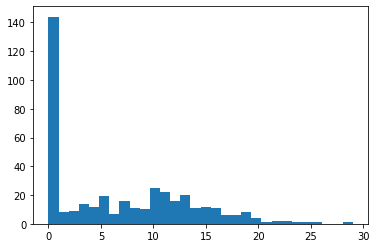

In [30]:
plt.hist(company.Advertising,bins=30)

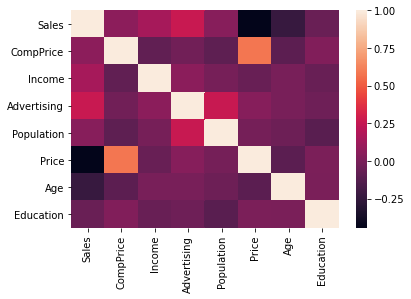

In [39]:
sns.heatmap(company.corr())

In [7]:
from sklearn.cluster import KMeans
df = np.array(company['Sales'])
df = df.reshape(-1,1)
model = KMeans(n_clusters=2)
model.fit(df)

KMeans(n_clusters=2)

In [8]:
x = pd.Series(model.labels_)
company['Cluster'] = x

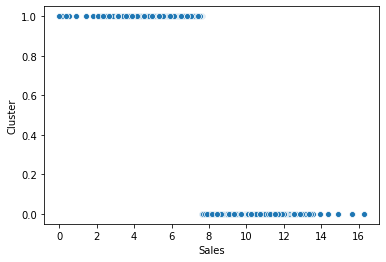

In [9]:
sns.scatterplot(x=company['Sales'],y=company['Cluster'])


In [10]:
sales = []
for num in company['Cluster']:
    if num == 0 :
        sales.append('Low')

    else:
        sales.append('High')

In [11]:
sales = pd.Series(sales)


In [12]:
company = pd.concat([sales,company],axis=1)
company.head()

,0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Cluster
0,Low,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,Low,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0
2,Low,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0
3,High,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,High,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1


In [13]:
company = company.drop_duplicates()

In [14]:
from sklearn import preprocessing

In [15]:
label = preprocessing.LabelEncoder()
company[0]= label.fit_transform(company[0])

In [16]:
company=company.drop('Sales',axis=1)

In [17]:
company = company.drop('Cluster', axis=1)

In [18]:
# one hot encoding
company = pd.get_dummies(company)
company

,0,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,1,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,0,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,0,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,0,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,0,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,0,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [19]:
X = company.drop(0,axis=1)
y = company[0]


## Decision Tree
### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=51)

In [21]:
#c5.0
from sklearn.tree import DecisionTreeClassifier
model_c5 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_c5.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
pred = model_c5.predict(X_test)
print('Accuracy: ',np.mean(pred==y_test)*100)

Accuracy:  75.0


In [23]:
#CART
model_cart = DecisionTreeClassifier(criterion='gini',max_depth=5)
model_cart.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [24]:
pred_cart = model_cart.predict(X_test)
print('Accuracy: ',np.mean(pred_cart==y_test)*100)

Accuracy:  83.33333333333334


## Random Forest

In [25]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
kfold = KFold(n_splits=2)
model_1 = RandomForestClassifier()


In [26]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(model_1,X,y,cv=kfold)
result.mean()

0.7875000000000001

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_features=10)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=10)

In [28]:
pred_rf = model.predict(X_test)

In [29]:
print('Accuracy: ',np.mean(y_test==pred_rf)*100)

Accuracy:  83.33333333333334
